In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)
%matplotlib inline
p = sns.color_palette(["mediumseagreen", "sandybrown", "royalblue", "orangered", "saddlebrown", "darkorchid"])
sns.set()

In [18]:
df = pd.read_csv('C:/Users/namoz/Desktop/world-happiness-report-2019.csv')

In [19]:
df.columns = ['country', 'ladder', 'ladder_sd', 'positive_affect', 'negative_affect', 'social_support', 'freedom', 'corruption', 'generosity', 'gdp_per_capita', 'healthy_life_expectancy']

In [20]:
df.sample(5)

,country,ladder,ladder_sd,positive_affect,negative_affect,social_support,freedom,corruption,generosity,gdp_per_capita,healthy_life_expectancy
125,Iraq,126,147,151.0,154.0,124.0,130.0,66.0,73.0,64.0,107.0
14,United Kingdom,15,16,52.0,42.0,9.0,63.0,15.0,4.0,23.0,24.0
10,Australia,11,26,47.0,37.0,7.0,17.0,13.0,6.0,18.0,10.0
68,Philippines,69,119,42.0,116.0,75.0,15.0,49.0,115.0,97.0,99.0
138,Togo,139,103,123.0,147.0,149.0,120.0,72.0,131.0,142.0,132.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  156 non-null    object 
 1   ladder                   156 non-null    int64  
 2   ladder_sd                156 non-null    int64  
 3   positive_affect          155 non-null    float64
 4   negative_affect          155 non-null    float64
 5   social_support           155 non-null    float64
 6   freedom                  155 non-null    float64
 7   corruption               148 non-null    float64
 8   generosity               155 non-null    float64
 9   gdp_per_capita           152 non-null    float64
 10  healthy_life_expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [22]:
pd.isnull(df).sum()

country                    0
ladder                     0
ladder_sd                  0
positive_affect            1
negative_affect            1
social_support             1
freedom                    1
corruption                 8
generosity                 1
gdp_per_capita             4
healthy_life_expectancy    6
dtype: int64

# Add continent column

In [23]:
asia = ["Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
                 "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
                 "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
                 "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
                 "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
                 "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
                 "Cambodia", "Afghanistan", "Yemen", "Syria"]
europe = ["Norway", "Denmark", "Iceland", "Switzerland", "Finland",
                 "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
                 "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
                 "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
                 "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
                 "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
                 "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
                 "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
                 "Bulgaria", "Albania", "Ukraine"]
north_america = ["Canada", "Costa Rica", "United States", "Mexico",  
                 "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                 "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                 "Haiti"]
south_america = ["Chile", "Brazil", "Argentina", "Uruguay",
                 "Colombia", "Ecuador", "Bolivia", "Peru",
                 "Paraguay", "Venezuela"]
australia = ["New Zealand", "Australia"]
d_asia = dict.fromkeys(asia, 'Asia')
d_europe = dict.fromkeys(europe, 'Europe')
d_north_america = dict.fromkeys(north_america, 'North America')
d_south_america = dict.fromkeys(south_america, 'South America')
d_australia = dict.fromkeys(australia, 'Australia')
continent_dict = {**d_asia, **d_europe, **d_north_america, **d_south_america, **d_australia}
df["continent"] = df["country"].map(continent_dict)
df.continent.fillna("Africa", inplace=True)

In [24]:
df.loc[df['country'] == 'Uzbekistan', 'freedom'] = np.nan

In [25]:
df[df.isnull().any(axis=1)]

,country,ladder,ladder_sd,positive_affect,negative_affect,social_support,freedom,corruption,generosity,gdp_per_capita,healthy_life_expectancy,continent
20,United Arab Emirates,21,65,43.0,56.0,72.0,4.0,NaN,15.0,4.0,60.0,Asia
24,Taiwan,25,37,17.0,1.0,48.0,102.0,56.0,56.0,NaN,NaN,Africa
27,Saudi Arabia,28,93,49.0,82.0,62.0,68.0,NaN,82.0,11.0,74.0,Asia
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0,Asia
36,Bahrain,37,83,39.0,83.0,59.0,24.0,NaN,23.0,20.0,42.0,Asia
40,Uzbekistan,41,99,19.0,15.0,11.0,NaN,18.0,29.0,104.0,83.0,Asia
45,Kosovo,46,107,71.0,7.0,85.0,50.0,144.0,31.0,88.0,NaN,Europe
50,Kuwait,51,98,89.0,97.0,69.0,47.0,NaN,42.0,5.0,70.0,Asia
63,Northern Cyprus,64,35,144.0,90.0,81.0,77.0,29.0,43.0,NaN,NaN,Africa
75,Hong Kong,76,33,105.0,28.0,76.0,66.0,14.0,18.0,9.0,NaN,Africa


# Life satisfaction across the globe
> - Important: All data in this dataset are rankings. In this case, the lower the value (deeper the color), the higher the life satisfaction

In [26]:
data = dict(type = 'choropleth', 
           locations = df['country'],
           locationmode = 'country names',
           z = df['ladder'], 
           text = df['country'],
           colorbar = {'title':'Ladder'},
           colorscale = "Blues")
layout = dict(title = 'Life satisfaction ladder 2019', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap = go.Figure(data = [data], layout=layout)
iplot(choromap)

# Overall Correlation Matrix

<AxesSubplot:>

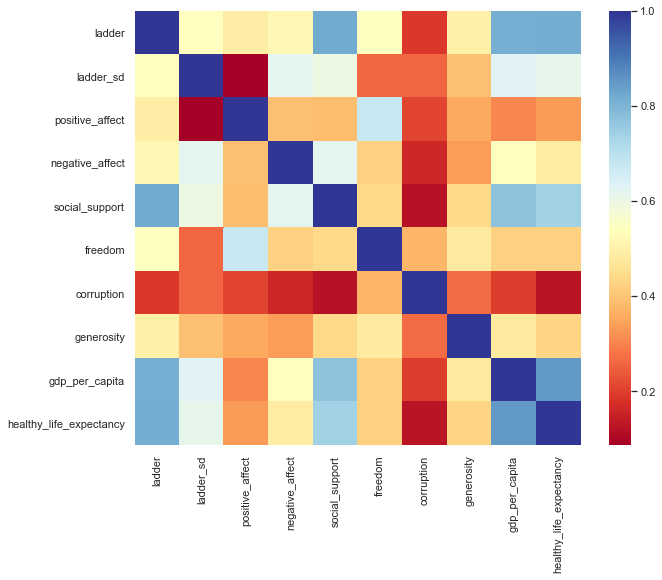

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdYlBu")

# Overall boxplot

<AxesSubplot:xlabel='ladder', ylabel='continent'>

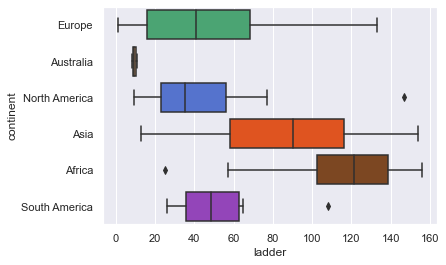

In [28]:
sns.boxplot(x="ladder", y="continent", data=df, palette=p)

# Freedom ranking per continent

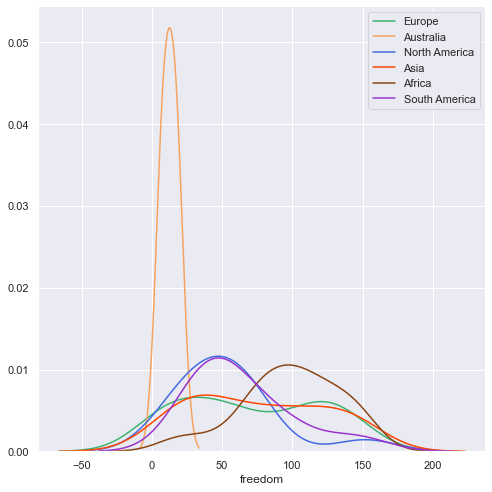

In [29]:
sns.FacetGrid(df, hue="continent", height=7, palette=p).map(sns.kdeplot, "freedom")
plt.legend()

In [30]:
north_america = df[df.continent=="North America"]
europe = df[df.continent=="Europe"]
asia = df[df.continent=="Asia"]

# Ladder distribution in North America

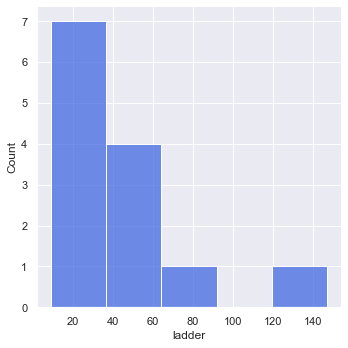

In [32]:
sns.displot(north_america.ladder, color='royalblue')

# Correlation between freedom and happiness in North America

C:\Users\namoz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



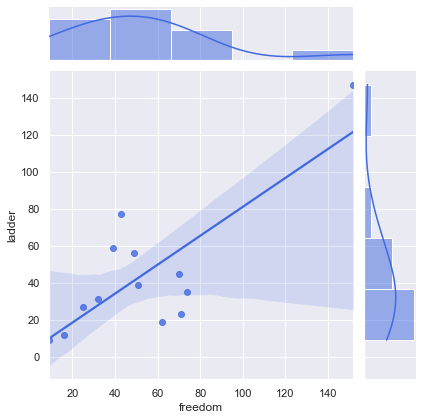

In [40]:
sns.jointplot("freedom", "ladder", data=north_america, kind='reg', color='royalblue')

# Correlation between generosity and happiness in North America

C:\Users\namoz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



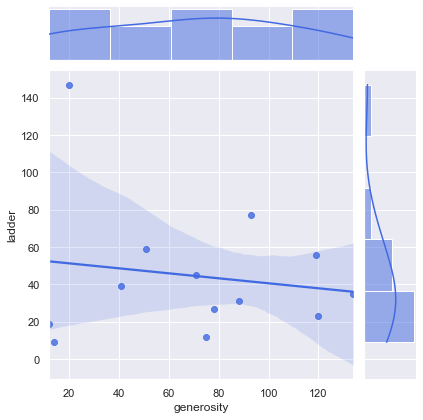

In [39]:
sns.jointplot("generosity", "ladder", data=north_america, kind='reg', color='royalblue')

# How is healthy life expectancy and life satisfaction correlated in North America

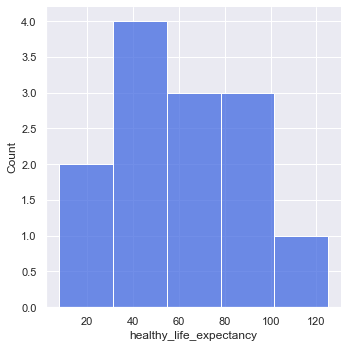

In [42]:
sns.displot(north_america.healthy_life_expectancy, color='royalblue')

In [43]:
north_america.iplot(kind='scatter', mode='markers', x='healthy_life_expectancy', y='ladder', text='country', color='royalblue', xTitle='Healthy Life Expectancy', yTitle='Ladder')

# How gdp per capita plays a role in all of these factors in North America

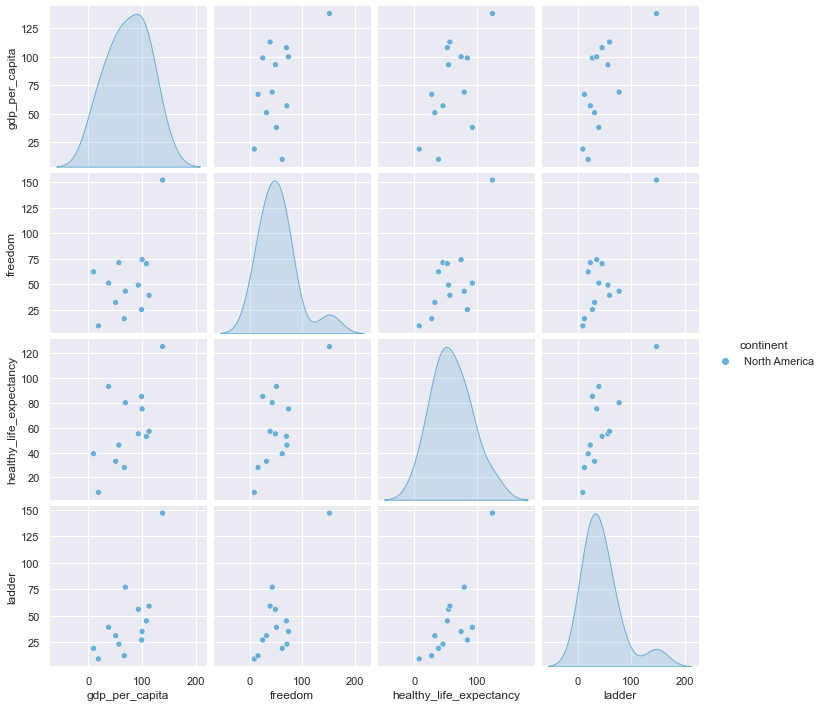

In [46]:
sns.pairplot(north_america[['gdp_per_capita', 'freedom', 'healthy_life_expectancy', 'ladder', 'continent']], hue='continent', palette="Blues")

# How corruption is correlated to life satisfaction in Europe

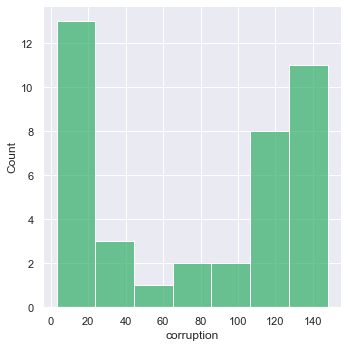

In [47]:
sns.displot(europe.corruption, color='mediumseagreen')

> - We can see there are little middle grounds in Europe

C:\Users\namoz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



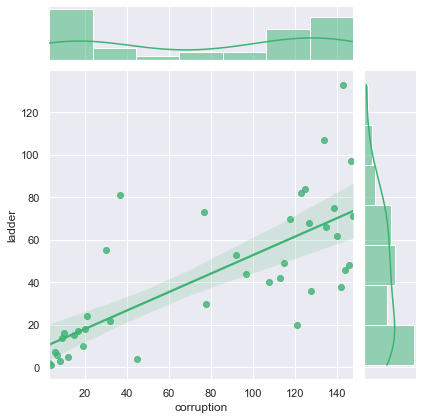

In [54]:
sns.jointplot("corruption", "ladder", data=europe, kind='reg', color='mediumseagreen')

# Correlation between generosity and life satisfaction in Europe

C:\Users\namoz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



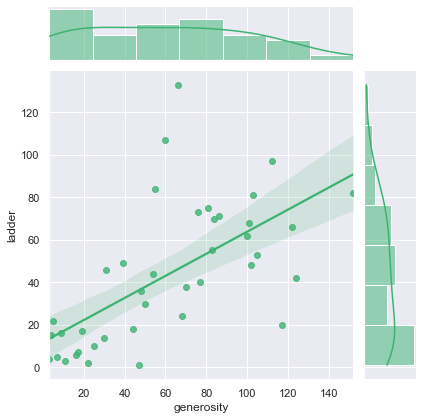

In [56]:
sns.jointplot("generosity", "ladder", data=europe, kind='reg', color='mediumseagreen')

# Correlation between gpd per capita and life satisfaction in Europe

C:\Users\namoz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



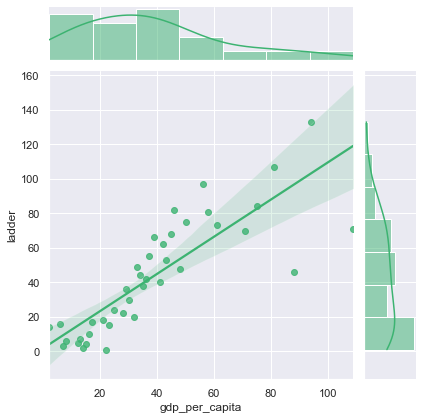

In [57]:
sns.jointplot("gdp_per_capita", "ladder", data=europe, kind='reg', color='mediumseagreen')

# Correlation between freedom and life satisfaction in Asia

In [58]:
asia.iplot(kind='scatter', mode='markers', x='freedom', y='ladder', text='country', color='orangered', xTitle='Freedom', yTitle='Ladder')

# Correlation between social support and life satisfaction

C:\Users\namoz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



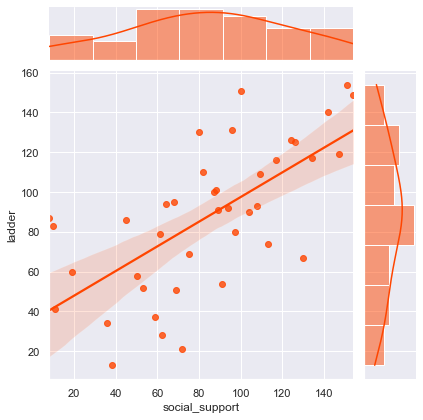

In [59]:
sns.jointplot("social_support", "ladder", data=asia, kind='reg', color='orangered')

# Correlation between healthy life expectancy and life satisfaction

C:\Users\namoz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



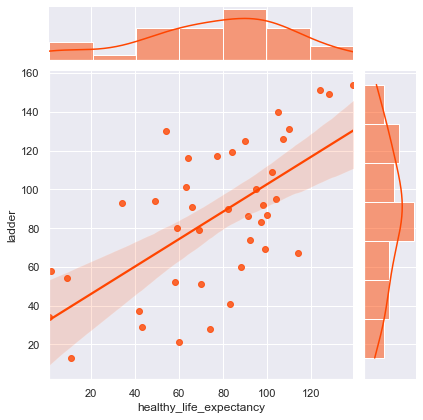

In [60]:
sns.jointplot("healthy_life_expectancy", "ladder", data=asia, kind='reg', color='orangered')

# How gdp per capita plays an important role in Asia

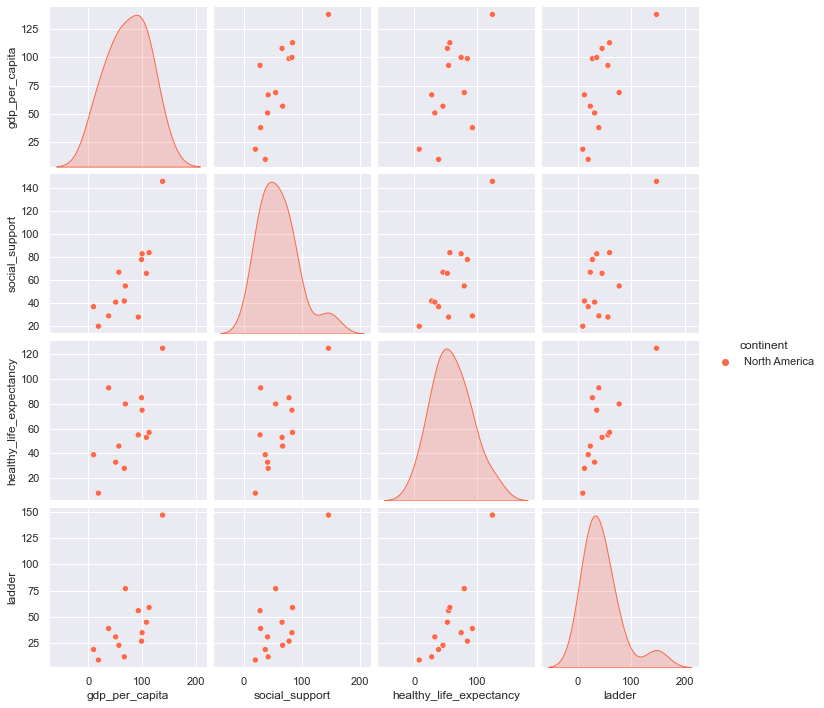

In [61]:
sns.pairplot(north_america[['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'ladder', 'continent']], hue="continent", palette="Reds")

In [62]:
np.corrcoef(x=asia.freedom, y=asia.ladder)

array([[nan, nan],
       [nan,  1.]])

# Summary: Correlation Matrix of three continents

<AxesSubplot:>

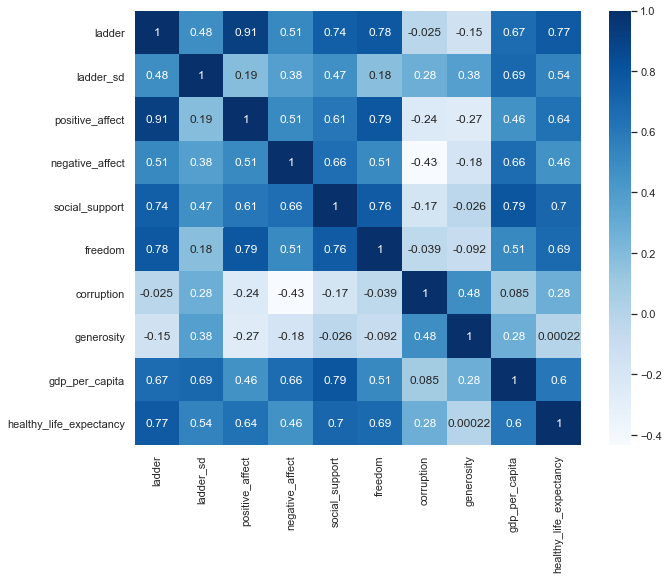

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(north_america.corr(), cmap="Blues", annot=True)

<AxesSubplot:>

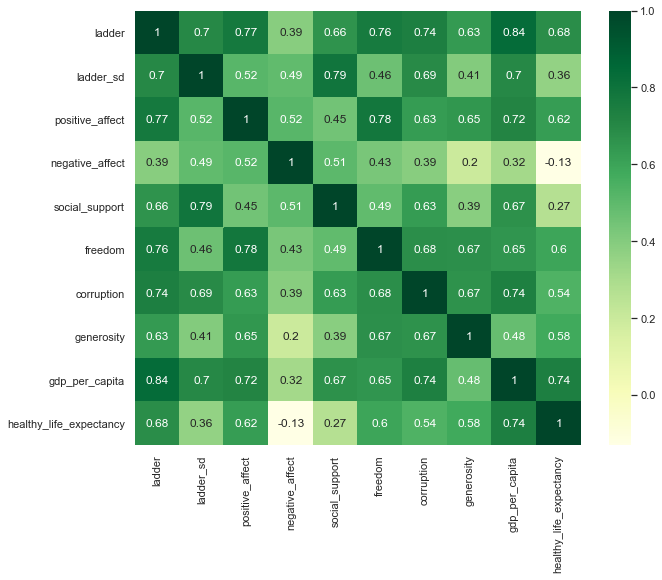

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(europe.corr(), cmap="YlGn", annot=True)

<AxesSubplot:>

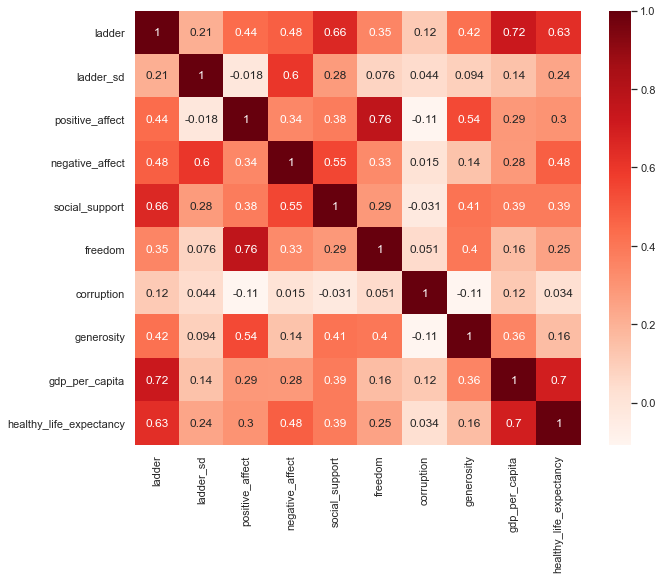

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(asia.corr(), cmap="Reds", annot=True)